# Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Classification Evaluation

Sources:
- <a href="https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9">Koo Ping Shung - Accuracy, Precision, Recall or F1?</a>
- <a href="https://www.youtube.com/watch?v=LbX4X71-TFI">AssemblyAI - How to evaluate ML models</a>

### Model

In [17]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

### Confusion Matrix

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td>TN - True Negative</td>
    <td>FP - False Positive</td>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td>FN - False Negative</td>
    <td>TP - True Positive</td>
  </tr>
</table>

</center>

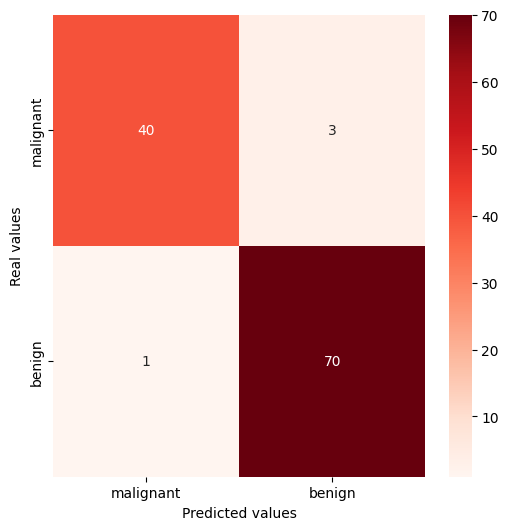

In [4]:
from sklearn.metrics import confusion_matrix

cnfMtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cnfMtx, annot=True, cmap="Reds")
plt.xticks([0.5,1.5], data.target_names)
plt.yticks([0.5,1.5], data.target_names)
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.show()

### Accuracy

$$
\text{Accuracy} = \frac{
  \textcolor{#b3ffa6}{TN}+\textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TN}+\textcolor{#ffa6a6}{FP}+\textcolor{#ffa6a6}{FN}+\textcolor{#b3ffa6}{TP}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: #b3ffa6;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [5]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Accuracy {:.0f}%".format(
    acc*100
))

Accuracy 96%


### Precision

$$
\text{Precision} = \frac{
  \textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TP}+\textcolor{#ffa6a6}{FP}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: ;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [79]:
from sklearn.metrics import precision_score

pre = precision_score(y_test, y_pred)

print("Precision: {:.0f}%".format(
    pre*100
))

Precision: 96%


### Recall

$$
\text{Recall} = \frac{
  \textcolor{#b3ffa6}{TP}}{
  \textcolor{#b3ffa6}{TP}+\textcolor{#ffa6a6}{FN}}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: ;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [80]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print("Recall: {:.0f}%".format(
    rec*100
))

Recall: 99%


### F1-Score

$$
\text{F1} = 2 \cdot \frac{{\text{Precision}} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 
\frac{2 \hspace{0.2em}
\textcolor{#b3ffa6}{TP}}{
2 \hspace{0.2em} \textcolor{#b3ffa6}{TP} + \textcolor{#ffa6a6}{FN} + \textcolor{#ffa6a6}{FP}
}
$$

<br>

<center>

<table style="color: black;">
  <tr style="background-color: #dbdbdb;">
    <th></th>
    <th>Predicted <br> No</th>
    <th>Predicted <br> Yes</th>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> No</b></td>
    <td style="background-color: ;">TN - True Negative</td>
    <td style="background-color: #ffa6a6;">FP - False Positive</td>
  </tr>
  <tr style="background-color: #f2f2f2;">
    <td style="background-color: #dbdbdb;"><b>Actual <br> Yes</b></td>
    <td style="background-color: #ffa6a6;">FN - False Negative</td>
    <td style="background-color: #b3ffa6;">TP - True Positive</td>
  </tr>
</table>

</center>

In [81]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print("F1-score: {:.0f}%".format(
    f1*100
))

F1-score: 97%


### Crossentropy

$$
\text{Log Loss} = -\sum_{i=1}^{n} y_i \cdot \log{\hat{y}_i}
$$

In [19]:
from sklearn.metrics import log_loss

logLoss = log_loss(y_test, y_pred)

print("Log Loss: {:.5f}".format(
    logLoss
))

Log Loss: 1.26469


# Regression Evaluation

Sources:
- <a href="https://www.youtube.com/watch?v=LbX4X71-TFI">AssemblyAI - How to evaluate ML models</a>
- <a href="https://www.youtube.com/watch?v=bMccdk8EdGo">StatQuest - R-squared</a>
- <a href="https://medium.com/analytics-vidhya/r-squared-formula-explanation-6dc0096ce3ba">Saurabh Gupta - R-Squared: Formula Explanation</a>

### Model

In [13]:
data = sns.load_dataset("mpg").dropna()

X = data.drop(["mpg", "origin", "name"], axis=1)
X = pd.concat([X, pd.get_dummies(data['origin'])], axis=1)
X = X.to_numpy().astype("float64")

y = data['mpg'].to_numpy().astype("float64")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linReg = LinearRegression()
linReg.fit(X_train, y_train)

y_pred = linReg.predict(X_test)

### MAE (Mean Absolut Error)

$$
\text{MAE} = \frac{1}{n} \sum_{i=0}^{n} \left| y_i - \hat{y}_i \right|
$$

In [15]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print("MAE: {:.5f}".format(
    mae
))

MAE: 2.46200


### MSE (Mean Squared Error) and RMSE (Root Mean Squared Error)

$$
\text{MSE} = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - \hat{y}_i \right)^2
$$

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{ \frac{1}{n} \sum_{i=0}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("MSE: {:.5f}\nRMSE: {:.5f}".format(
    mse,
    np.sqrt(mse)
))

MSE: 10.60228
RMSE: 3.25611


### R2 (Coefficient of Determination)

$R^2$ is the percentage of variation explained by the relationship between two variables.

$$
R^2 = 1 - \frac{ \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 }{ \sum_{i=1}^{m} \left( y_i - \bar{y}_i \right)^2 }
$$

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R-Squared: {:.2f}".format(
    r2
))

R-Squared: 0.85


### Cosine Similarity

$$
\vec{u} = \left[ \begin{array}{c} u_1 \\ u_2 \\ ... \\ u_n \end{array} \right]
\hspace{3em}
\vec{v} = \left[ \begin{array}{c} v_1 \\ v_2 \\ ... \\ v_n \end{array} \right]
$$

<br>

$$
\text{Cosine Similarity} = \cos{\theta}
= \frac{ \vec{u} \cdot \vec{v} }{ \left\| \vec{u} \right\| \left\| \vec{v} \right\| }
= \frac{ \sum_{i=1}^n \vec{u}_i \vec{v}_i }{ \sqrt{ \sum_{i=1}^n \vec{u}_i^2 } \sqrt{ \sum_{i=1}^n \vec{v}_i^2 } }
$$

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosSim = cosine_similarity(y_test.reshape((1, -1)), y_pred.reshape((1, -1)))
cosSim = cosSim[0][0]

print("Cosine Similarity: {:.5f}".format(
    cosSim
))

Cosine Similarity: 0.97232
